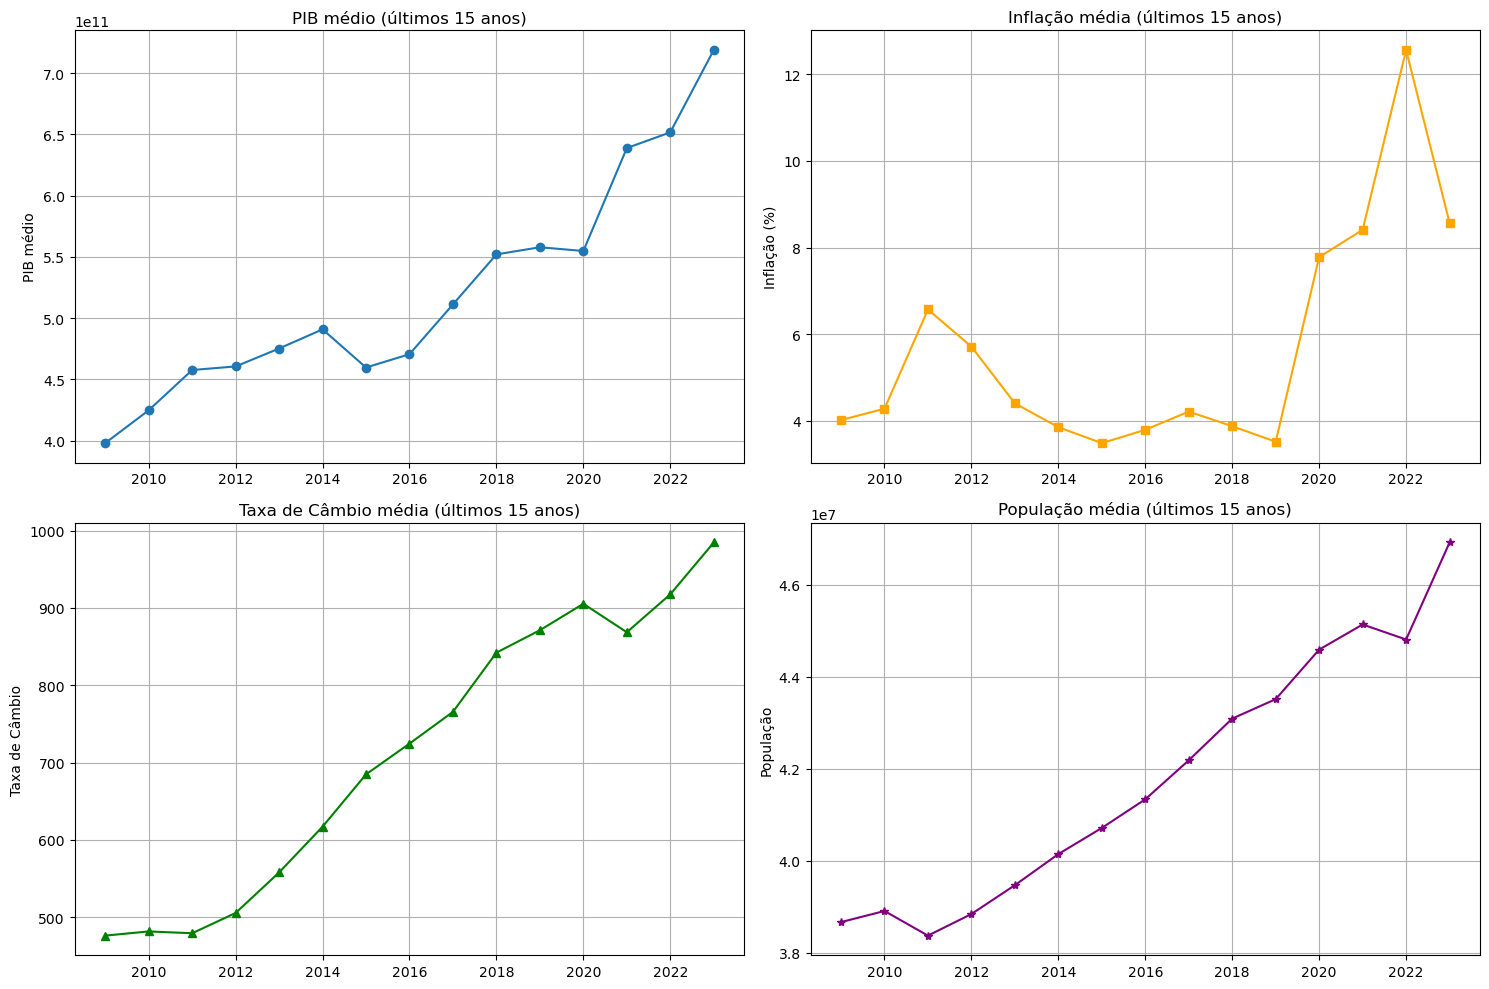

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 📂 Ler o CSV
df = pd.read_csv('zProjeto_Final/Datasets/dados_economicos.csv')

# 🧮 Converter Year para numérico
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
ano_max = df['Year'].max()
anos_inicio = ano_max - 14
df_recente = df[df['Year'] >= anos_inicio]

# 📈 Agrupar por ano
df_ano = df_recente.groupby('Year').agg(
    PIB_medio=('GDP', 'mean'),
    Inf_medio=('Inflation Rate', 'mean'),
    Cambio_medio=('Taxa de Câmbio', 'mean'),
    Pop_medio=('Population', 'mean')
).reset_index()

# 🎨 Plotar evolução temporal
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(df_ano['Year'], df_ano['PIB_medio'], marker='o')
plt.title('PIB médio (últimos 15 anos)')
plt.ylabel('PIB médio')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(df_ano['Year'], df_ano['Inf_medio'], marker='s', color='orange')
plt.title('Inflação média (últimos 15 anos)')
plt.ylabel('Inflação (%)')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(df_ano['Year'], df_ano['Cambio_medio'], marker='^', color='green')
plt.title('Taxa de Câmbio média (últimos 15 anos)')
plt.ylabel('Taxa de Câmbio')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(df_ano['Year'], df_ano['Pop_medio'], marker='*', color='purple')
plt.title('População média (últimos 15 anos)')
plt.ylabel('População')
plt.grid(True)

plt.tight_layout()
plt.savefig('indicadores_economicos_15_anos.png')
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 📂 Ler o CSV
df = pd.read_csv('zProjeto_Final/Datasets/dados_economicos.csv')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# 🎯 Selecionar os últimos 15 anos
ano_max = df['Year'].max()
anos_inicio = ano_max - 14
df_recente = df[df['Year'] >= anos_inicio]

# 🧮 Calcular PIB médio por país
pib_medio_pais = df_recente.groupby('Country Name')['GDP'].mean().sort_values(ascending=False)

# 🔝 Selecionar top 10 países
top10_paises = pib_medio_pais.head(10).index

# 📊 Gerar gráfico para cada país
for pais in top10_paises:
    df_pais = df_recente[df_recente['Country Name'] == pais].sort_values('Year')
    
    fig, axes = plt.subplots(2, 2, figsize=(12,8))
    fig.suptitle(f'Indicadores Econômicos - {pais} (Últimos 15 anos)', fontsize=14, fontweight='bold')
    
    # 📈 PIB
    axes[0, 0].plot(df_pais['Year'], df_pais['GDP'], marker='o', color='blue')
    axes[0, 0].set_title('PIB')
    axes[0, 0].grid(True)
    
    # 📈 Inflação
    axes[0, 1].plot(df_pais['Year'], df_pais['Inflation Rate'], marker='s', color='orange')
    axes[0, 1].set_title('Inflação (%)')
    axes[0, 1].grid(True)
    
    # 📈 Taxa de câmbio
    axes[1, 0].plot(df_pais['Year'], df_pais['Taxa de Câmbio'], marker='^', color='green')
    axes[1, 0].set_title('Taxa de Câmbio')
    axes[1, 0].grid(True)
    
    # 📈 População
    axes[1, 1].plot(df_pais['Year'], df_pais['Population'], marker='*', color='purple')
    axes[1, 1].set_title('População')
    axes[1, 1].grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'grafico_{pais}.png')
    plt.close(fig)

print(f'✅ Gráficos gerados para os top 10 países com maior PIB médio ({ano_max-14} a {ano_max}).')


✅ Gráficos gerados para os top 10 países com maior PIB médio (2009 a 2023).


In [33]:
# Remover espaços extras e normalizar os nomes das colunas
df_econ.columns = df_econ.columns.str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_exp.columns = df_exp.columns.str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Verificar se os nomes das colunas foram ajustados corretamente
print(df_econ.columns)
print(df_exp.columns)


Index(['Pais', 'Ano', 'GDP', 'Inflation Rate', 'Taxa de Cambio', 'Population'], dtype='object')
Index(['Pais', 'Ano', 'Quantidade (kg)', 'Valor_USD'], dtype='object')


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Ler datasets
df_econ = pd.read_csv('zProjeto_Final/Datasets/dados_economicos.csv')
df_exp = pd.read_csv('zProjeto_Final/Datasets/Exportacao.csv')

# 🔄 Verificar e remover espaços extras das colunas
df_econ.columns = df_econ.columns.str.strip()
df_exp.columns = df_exp.columns.str.strip()

# 🔄 Merge entre os datasets
df_merged = pd.merge(
    df_econ,
    df_exp,
    on=['Pais', 'Ano'],
    how='inner'
)

# 🎯 Últimos 15 anos
ano_max = df_merged['Ano'].max()
anos_inicio = ano_max - 14
df_recente = df_merged[df_merged['Ano'] >= anos_inicio]

# 🧮 Matriz de correlação (com as variáveis numéricas)
corr_matrix = df_recente[['GDP', 'Inflation Rate', 'Taxa de Cambio', 'Population', 'Quantidade (kg)', 'Valor_USD']].corr()

# 📊 Plotar matriz
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Últimos 15 anos)')
plt.tight_layout()
plt.savefig('matriz_correlacao.png')
plt.close()

# 📄 Correlacoes por país
relatorio_corr = []
for pais in df_recente['Pais'].unique():
    df_pais = df_recente[df_recente['Pais'] == pais]
    corr_pais = df_pais[['GDP', 'Inflation Rate', 'Taxa de Cambio', 'Population', 'Quantidade (kg)', 'Valor_USD']].corr()
    relatorio_corr.append([pais,
                           corr_pais.loc['Quantidade (kg)', 'GDP'],
                           corr_pais.loc['Quantidade (kg)', 'Inflation Rate'],
                           corr_pais.loc['Quantidade (kg)', 'Taxa de Cambio'],
                           corr_pais.loc['Quantidade (kg)', 'Population'],
                           corr_pais.loc['Valor_USD', 'GDP'],
                           corr_pais.loc['Valor_USD', 'Inflation Rate'],
                           corr_pais.loc['Valor_USD', 'Taxa de Cambio'],
                           corr_pais.loc['Valor_USD', 'Population']])

df_relatorio_corr = pd.DataFrame(
    relatorio_corr,
    columns=['Pais',
             'corr_Qtd_GDP', 'corr_Qtd_Inflation', 'corr_Qtd_Cambio', 'corr_Qtd_Pop',
             'corr_Valor_GDP', 'corr_Valor_Inflation', 'corr_Valor_Cambio', 'corr_Valor_Pop']
)
df_relatorio_corr.to_csv('correlacoes_por_pais.csv', index=False)

# 🧮 Selecionar top 10 países por média de exportação
top10 = df_recente.groupby('Pais')['Quantidade (kg)'].mean().sort_values(ascending=False).head(10).index

# 📈 Gráficos evolução PIB vs Exportações
for pais in top10:
    df_pais = df_recente[df_recente['Pais'] == pais].sort_values('Ano')
    fig, ax1 = plt.subplots(figsize=(10,6))
    ax1.plot(df_pais['Ano'], df_pais['Quantidade (kg)'], marker='o', color='green', label='Quantidade (kg)')
    ax1.set_ylabel('Quantidade (kg)', color='green')
    ax1.set_xlabel('Ano')
    ax1.tick_params(axis='y', labelcolor='green')
    ax2 = ax1.twinx()
    ax2.plot(df_pais['Ano'], df_pais['GDP'], marker='s', color='blue', label='GDP')
    ax2.set_ylabel('GDP', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    plt.title(f'{pais} - Exportações x PIB')
    fig.tight_layout()
    fig.savefig(f'{pais}_Export_PIB.png')
    plt.close(fig)

print('✅ Concluído! Gerados: matriz_correlacao.png, correlacoes_por_pais.csv e gráficos PIB x Export para top 10 países.')


KeyError: 'Pais'

In [36]:
print(df_econ.head())  # Exibe as 5 primeiras linhas do dataframe de dados econômicos
print(df_exp.head())   # Exibe as 5 primeiras linhas do dataframe de exportação



   Country Name  Year           GDP  Inflation Rate  Taxa de Câmbio  \
0     Australia  1960  1.860768e+10        3.728814        0.892857   
1       Austria  1960  6.624086e+09        1.945749       26.000000   
2       Belgium  1960  1.181062e+10        0.299467       50.000000   
3  Burkina Faso  1960  3.304428e+08        7.788162      245.195101   
4       Bolivia  1960  3.732500e+08       11.533153        0.000012   

   Population  
0  10276477.0  
1   7047539.0  
2   9153489.0  
3   4778621.0  
4   3702323.0  
          País   Ano  Quantidade (kg)  Valor_USD
0  Afeganistão  1970                0          0
1  Afeganistão  1971                0          0
2  Afeganistão  1972                0          0
3  Afeganistão  1973                0          0
4  Afeganistão  1974                0          0


In [37]:
import pandas as pd

# 📂 Ler datasets
df_econ = pd.read_csv('zProjeto_Final/Datasets/dados_economicos.csv')
df_exp = pd.read_csv('zProjeto_Final/Datasets/Exportacao.csv')

# 🧼 Normalizando os nomes das colunas
df_econ.columns = df_econ.columns.str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_exp.columns = df_exp.columns.str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Verificar os nomes das colunas após a normalização
print("Nomes das colunas do dataset de dados econômicos:")
print(df_econ.columns)
print("\nNomes das colunas do dataset de exportação:")
print(df_exp.columns)

# Verifique as primeiras linhas para ver se as colunas estão corretas
print("\nPrimeiras linhas do dataset de dados econômicos:")
print(df_econ.head())
print("\nPrimeiras linhas do dataset de exportação:")
print(df_exp.head())


Nomes das colunas do dataset de dados econômicos:
Index(['Country Name', 'Year', 'GDP', 'Inflation Rate', 'Taxa de Cambio',
       'Population'],
      dtype='object')

Nomes das colunas do dataset de exportação:
Index(['Pais', 'Ano', 'Quantidade (kg)', 'Valor_USD'], dtype='object')

Primeiras linhas do dataset de dados econômicos:
   Country Name  Year           GDP  Inflation Rate  Taxa de Cambio  \
0     Australia  1960  1.860768e+10        3.728814        0.892857   
1       Austria  1960  6.624086e+09        1.945749       26.000000   
2       Belgium  1960  1.181062e+10        0.299467       50.000000   
3  Burkina Faso  1960  3.304428e+08        7.788162      245.195101   
4       Bolivia  1960  3.732500e+08       11.533153        0.000012   

   Population  
0  10276477.0  
1   7047539.0  
2   9153489.0  
3   4778621.0  
4   3702323.0  

Primeiras linhas do dataset de exportação:
          Pais   Ano  Quantidade (kg)  Valor_USD
0  Afeganistão  1970                0          0
1

KeyError: 'Pais'